# Setting Workspace

In [1]:
!pip install ipython-autotime
!pip install transformers

In [2]:
%load_ext autotime

time: 127 µs (started: 2021-08-06 12:30:26 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 5.24 ms (started: 2021-08-06 12:30:26 +00:00)


In [4]:
!pwd
import os
os.chdir('/content/drive/My Drive/HLT/')
!pwd

/content
/content/drive/My Drive/HLT
time: 239 ms (started: 2021-08-06 12:30:26 +00:00)


# Import Libraries

In [5]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english') # listtime
nltk.download('wordnet')
import string
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
from collections import defaultdict
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from gensim.models import Word2Vec,KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
import transformers
from transformers import BertTokenizer,TFBertModel
from sklearn.model_selection import train_test_split
import matplotlib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


time: 15.1 s (started: 2021-08-06 12:30:26 +00:00)


In [6]:
# !pip freeze > requirements.txt

time: 1.77 ms (started: 2021-08-06 12:30:41 +00:00)


In [7]:
# stop_words[:20]

time: 888 µs (started: 2021-08-06 12:30:41 +00:00)


In [8]:
pd.set_option('display.max_colwidth', -1) # show all text in col
pd.set_option('display.max_rows', None) # show all rows

time: 2.62 ms (started: 2021-08-06 12:30:41 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



# Load the Dataset


In [9]:
df = pd.read_json('datasets/Sarcasm_Headlines_Dataset.json',lines=True)
df['headline'].head(10) #observe col to see areas for cleaning

0    former versace store clerk sues over secret 'black code' for minority shoppers      
1    the 'roseanne' revival catches up to our thorny political mood, for better and worse
2    mom starting to fear son's web series closest thing she will have to grandchild     
3    boehner just wants wife to listen, not come up with alternative debt-reduction ideas
4    j.k. rowling wishes snape happy birthday in the most magical way                    
5    advancing the world's women                                                         
6    the fascinating case for eating lab-grown meat                                      
7    this ceo will send your kids to school, if you work for his company                 
8    top snake handler leaves sinking huckabee campaign                                  
9    friday's morning email: inside trump's presser for the ages                         
Name: headline, dtype: object

time: 231 ms (started: 2021-08-06 12:30:41 +00:00)


# Data Analysis

In [10]:
df.shape #check dimensions

(26709, 3)

time: 4.53 ms (started: 2021-08-06 12:30:41 +00:00)


In [11]:
df.isna().sum() #check for any nulls

article_link    0
headline        0
is_sarcastic    0
dtype: int64

time: 14.7 ms (started: 2021-08-06 12:30:42 +00:00)


In [12]:
df['headline'].describe()

count     26709         
unique    26602         
top       sunday roundup
freq      10            
Name: headline, dtype: object

time: 32.7 ms (started: 2021-08-06 12:30:42 +00:00)


In [13]:
len(df), df.index.shape[-1]

(26709, 26709)

time: 7.32 ms (started: 2021-08-06 11:34:47 +00:00)


In [14]:
## Assess the shape of the data
print("The Shape of the Dataset".format(),df.shape)

The Shape of the Dataset (26709, 3)
time: 2.94 ms (started: 2021-08-06 11:34:47 +00:00)


In [15]:
# check for columns with null values
df.is_sarcastic.isnull().any() # no missing values in is_sarcastic column
df.headline.isnull().any() # no missing values in headline column

False

time: 12.8 ms (started: 2021-08-06 11:34:47 +00:00)


In [16]:
df.describe()

,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


time: 24.7 ms (started: 2021-08-06 11:34:47 +00:00)


In [17]:
df['headline'].describe()

count     26709                                      
unique    26602                                      
top       the 20 funniest tweets from women this week
freq      10                                         
Name: headline, dtype: object

time: 31.8 ms (started: 2021-08-06 11:34:47 +00:00)


## Statistical Analysis I


In [18]:
not_sarcastic_headline=df[df['is_sarcastic']== 0]['headline']
sarcastic_headline=df[df['is_sarcastic']== 1]['headline']
print("First 10 samples of not sarcastic headlines\n".format(),not_sarcastic_headline[:10])
print("First 10 samples of sarcastic headlines\n".format(),sarcastic_headline[:10])

First 10 samples of not sarcastic headlines
 0     former versace store clerk sues over secret 'black code' for minority shoppers      
1     the 'roseanne' revival catches up to our thorny political mood, for better and worse
4     j.k. rowling wishes snape happy birthday in the most magical way                    
5     advancing the world's women                                                         
6     the fascinating case for eating lab-grown meat                                      
7     this ceo will send your kids to school, if you work for his company                 
9     friday's morning email: inside trump's presser for the ages                         
10    airline passengers tackle man who rushes cockpit in bomb threat                     
11    facebook reportedly working on healthcare features and apps                         
12    north korea praises trump and urges us voters to reject 'dull hillary'              
Name: headline, dtype: object
First 10 sample

### Sarcastic and Not Sarcastic headline pie plot

In [19]:
df_tar = df['is_sarcastic'].value_counts()
labels = ['Not Sarcastic', 'Sarcastic']
sizes = (np.array((df_tar / df_tar.sum())*100))
colors = ['#ea0103', '#0058b4']

trace = go.Pie(labels=labels, values=sizes, opacity = 0.8, hoverinfo='label+percent',
               marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
layout = go.Layout(
    title='Sarcastic Vs Not Sarcastic'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Sa_Ac")

time: 1.26 s (started: 2021-08-06 11:34:47 +00:00)


### Sarcastic and Not Sarcastic headline bar plot

Total Counts of both sets 0    14985
1    11724
Name: is_sarcastic, dtype: int64


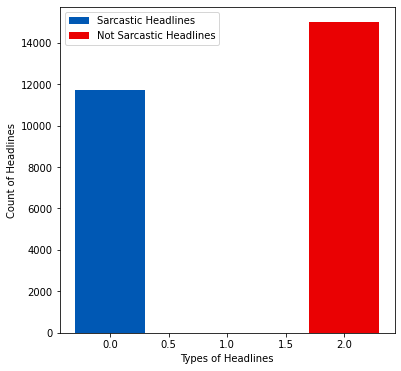

time: 271 ms (started: 2021-08-06 11:34:48 +00:00)


In [20]:
#Count of sarcastic and not sarcastic headlines
count=df['is_sarcastic'].value_counts()
print('Total Counts of both sets'.format(),count)

print("==============")
#Creating a function to plot the counts using matplotlib
def plot_counts(sarcastic_headline,not_sarcastic_headline):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,sarcastic_headline,width=0.6,label='Sarcastic Headlines',color='#0058b4')
    plt.legend()
    plt.bar(2,not_sarcastic_headline,width=0.6,label='Not Sarcastic Headlines',color='#ea0103')
    plt.legend()
    plt.ylabel('Count of Headlines')
    plt.xlabel('Types of Headlines')
    plt.show()
    
sarcastic_headline=df[df['is_sarcastic']==1]
not_sarcastic_headline=df[df['is_sarcastic']==0]
plot_counts(len(sarcastic_headline),len(not_sarcastic_headline))

In [21]:
sarcastic_headline['headline'].shape[0]

11724

time: 5.1 ms (started: 2021-08-06 11:34:48 +00:00)


### Count of words & word lenght distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



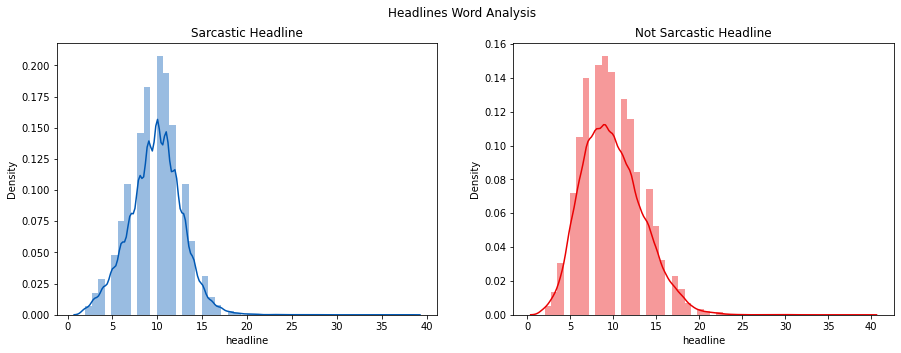

time: 786 ms (started: 2021-08-06 11:34:48 +00:00)


In [22]:
# Analyse the count of words in each segment- both sarcastic and not sarcastic headlines
# Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='#0058b4')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='#ea0103')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


sarcastic_headline_words=sarcastic_headline['headline'].str.split().apply(lambda z:cal_len(z)) # <class 'pandas.core.series.Series'>
not_sarcastic_headline_words=not_sarcastic_headline['headline'].str.split().apply(lambda z:cal_len(z))
# print("Sarcastic Headline Words:" + str(sarcastic_headline_words))
# print(type(sarcastic_headline_words))
# print("Sarcastic Headline Words:" + str(not_sarcastic_headline_words))
plot_count(sarcastic_headline_words,not_sarcastic_headline_words,"Sarcastic Headline","Not Sarcastic Headline","Headlines Word Analysis")

### Count Punctuations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



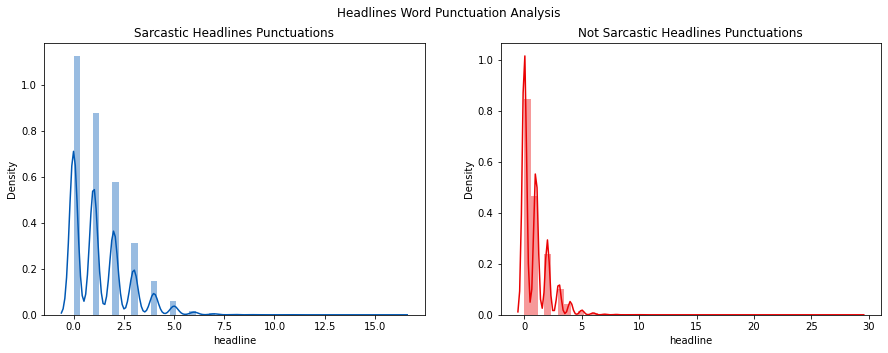

time: 825 ms (started: 2021-08-06 11:34:49 +00:00)


In [23]:
#Count Punctuations/Stopwords/Codes and other semantic datatypes
#We will be using the "generic_plotter" function.

sarcastic_headline_punctuations=sarcastic_headline['headline'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
not_sarcastic_headline_punctuations=not_sarcastic_headline['headline'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count(sarcastic_headline_punctuations,not_sarcastic_headline_punctuations,"Sarcastic Headlines Punctuations","Not Sarcastic Headlines Punctuations","Headlines Word Punctuation Analysis")

### Stopwords distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



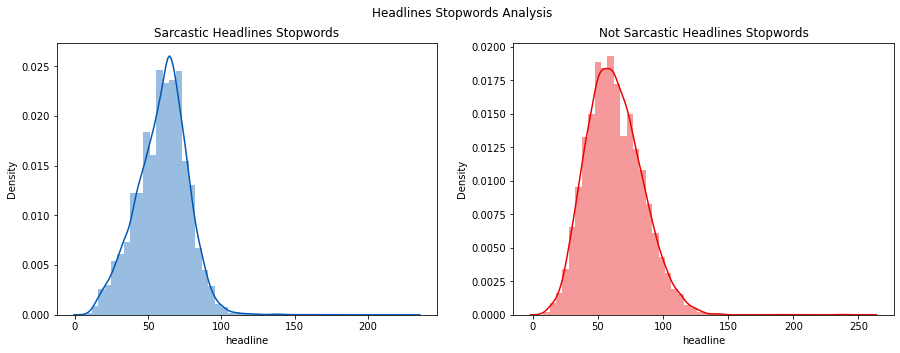

time: 1.15 s (started: 2021-08-06 11:34:50 +00:00)


In [24]:
#Analyse Stopwords

def plot_count_1(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='#0058b4')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='#ea0103')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


stops=set(stopwords.words('english'))
sarcastic_headline_stops=sarcastic_headline['headline'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
not_sarcastic_headline_stops=not_sarcastic_headline['headline'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
plot_count_1(sarcastic_headline_stops,not_sarcastic_headline_stops,"Sarcastic Headlines Stopwords","Not Sarcastic Headlines Stopwords","Headlines Stopwords Analysis")

### Most Frequent Words

In [25]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequent Occuring word (unclean) in Headlines'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


time: 2.32 s (started: 2021-08-06 11:34:51 +00:00)


In [26]:
sar_df = df[df['is_sarcastic']==1]

all_words = sar_df['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequent Occuring word (unclean) in Sarcastic Headlines'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


time: 991 ms (started: 2021-08-06 11:34:53 +00:00)


In [27]:
not_sar_df = df[df['is_sarcastic']==0]

all_words = not_sar_df['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequent Occuring word (unclean) in Not Sarcastic Headlines'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


time: 1.4 s (started: 2021-08-06 11:34:54 +00:00)


In [28]:
# #Simplified counter function
# def create_corpus(label):
#     corpus=[]
    
#     for x in df[df['is_sarcastic']==label]['headline'].str.split():
#         for i in x:
#             corpus.append(i)
#     return corpus

# corpus=create_corpus(1)
# counter=Counter(corpus)
# most=counter.most_common()
# x=[]
# y=[]
# for word,count in most[:100]:
#     if (word not in stops) :
#         x.append(word)
#         y.append(count)
# sns.barplot(x=y,y=x)

time: 5.36 ms (started: 2021-08-06 11:34:56 +00:00)


In [29]:
# #Simplified counter function
# def create_corpus(label):
#     corpus=[]
    
#     for x in df[df['is_sarcastic']==label]['headline'].str.split():
#         for i in x:
#             corpus.append(i)
#     return corpus

# corpus=create_corpus(0)
# counter=Counter(corpus)
# most=counter.most_common()
# x=[]
# y=[]
# for word,count in most[:100]:
#     if (word not in stops) :
#         x.append(word)
#         y.append(count)
# sns.barplot(x=y,y=x)

time: 5.39 ms (started: 2021-08-06 11:34:56 +00:00)


## Inference From Analysis I

We can infer that:

- The dataset is slightly unbalanced.
- Punctuations/stopwords are present in a equal distribution in the dataset.


## Statistical Analysis II



In [30]:
#Gram analysis on Training set- Bigram and Trigram
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'orange')
    return trace
    
def plot_grams(trace_zero,trace_one):
    fig = make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of Sarcastic Headlines", 
                                          "Frequent words of Not Sarcastic Headlines"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
df_zero=not_sarcastic_headline['headline']
df_ones=sarcastic_headline['headline']

print("Bi-gram analysis")
freq_df_zero=create_dict(df_zero[:200],2)
#print(freq_df_zero)
trace_zero=create_new_df(freq_df_zero)

freq_df_ones=create_dict(df_ones[:200],2)
#print(freq_df_zero)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)

print("Tri-gram analysis")
freq_df_zero=create_dict(df_zero[:200],3)
#print(freq_df_zero)
trace_zero=create_new_df(freq_df_zero)

freq_df_ones=create_dict(df_ones[:200],3)
#print(freq_df_zero)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)

Bi-gram analysis


Tri-gram analysis


time: 989 ms (started: 2021-08-06 11:34:56 +00:00)


In [31]:
#Lets fo a Penta-Gram analysis to get an idea how the vectorization will be performed
print("Penta-gram analysis")
freq_df_zero=create_dict(df_zero[:200],5)
#print(freq_df_zero)
trace_zero=create_new_df(freq_df_zero)
freq_df_ones=create_dict(df_ones[:200],5)
#print(freq_df_zero)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)


Penta-gram analysis


time: 355 ms (started: 2021-08-06 11:34:57 +00:00)


## Inference from Analysis II

The Gram analysis, provides an idea of which sentences occur more often in the corpus.

## Statistical Analysis III

In [32]:
#create source headline
df['source'] = df['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])
df.head()

,article_link,headline,is_sarcastic,source
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0,huffingtonpost
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,huffingtonpost
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1,theonion
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,theonion
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0,huffingtonpost


time: 135 ms (started: 2021-08-06 11:34:57 +00:00)


In [33]:
# drop article_link
# df = df[["headline", "is_sarcastic", "source"]]
# df = df.iloc[:, 1:]
df.drop('article_link', axis=1, inplace=True)
df.head(10)

,headline,is_sarcastic,source
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,huffingtonpost
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,huffingtonpost
2,mom starting to fear son's web series closest thing she will have to grandchild,1,theonion
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,theonion
4,j.k. rowling wishes snape happy birthday in the most magical way,0,huffingtonpost
5,advancing the world's women,0,huffingtonpost
6,the fascinating case for eating lab-grown meat,0,huffingtonpost
7,"this ceo will send your kids to school, if you work for his company",0,huffingtonpost
8,top snake handler leaves sinking huckabee campaign,1,theonion
9,friday's morning email: inside trump's presser for the ages,0,huffingtonpost


time: 25.8 ms (started: 2021-08-06 11:34:57 +00:00)


In [34]:
# #Non-Sarcastic vs Sarcastic
# sns.countplot(df['is_sarcastic'],palette=["#0058b4", "#ea0103"])
# plt.title("Non-Sarcastic vs Sarcastic")
# print("No of Non-Sarcastic news: ",df['is_sarcastic'].value_counts()[0])
# print("No of Sarcastic news: ",df['is_sarcastic'].value_counts()[1])

time: 1.75 ms (started: 2021-08-06 11:34:57 +00:00)


### Source Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



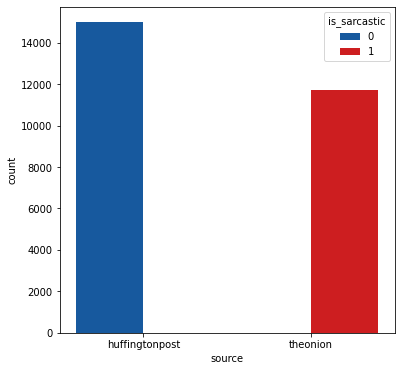

time: 236 ms (started: 2021-08-06 11:34:57 +00:00)


In [35]:
#Source
sns.countplot(df['source'],hue=df['is_sarcastic'],palette=["#0058b4", "#ea0103"])

In [36]:
# #Average word length in text
# fig,ax = plt.subplots(figsize=(16,8))
# fig.suptitle("AVERAGE WORD LENGTH IN A TEXT")

# plt.subplot(1,2,1)
# plt.title("Non-Sarcastic Text")
# word_length = df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x : [len(i) for i in x] )
# sns.distplot(word_length.map(lambda x: np.mean(x)),kde=True)

# plt.subplot(1,2,2)
# plt.title("Sarcastic Text")
# word_length = df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x : [len(i) for i in x] )
# sns.distplot(word_length.map(lambda x: np.mean(x)),kde=True)

time: 3.65 ms (started: 2021-08-06 11:34:58 +00:00)


In [37]:
stats_df = df.copy()

time: 2.5 ms (started: 2021-08-06 11:34:58 +00:00)


In [38]:
stats_df['headline_count'] = stats_df.headline.apply(lambda x: len(list(x.split())))
stats_df['headline_unique_word_count'] = stats_df.headline.apply(lambda x: len(set(x.split())))
stats_df['headline_has_digits'] = stats_df.headline.apply(lambda x: bool(re.search(r'\d', x)))
stats_df.head(5)

,headline,is_sarcastic,source,headline_count,headline_unique_word_count,headline_has_digits
0,former versace store clerk sues over secret 'black code' for minority shoppers,0,huffingtonpost,12,12,False
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0,huffingtonpost,14,14,False
2,mom starting to fear son's web series closest thing she will have to grandchild,1,theonion,14,13,False
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1,theonion,13,13,False
4,j.k. rowling wishes snape happy birthday in the most magical way,0,huffingtonpost,11,11,False


time: 172 ms (started: 2021-08-06 11:34:58 +00:00)


### Frequencies Sarcastic and Not Sarcastic barplot

In [39]:
# sarcastic_dat = stats_df.groupby('is_sarcastic').count()
# sarcastic_dat.index = ['Non-sarcastic','Sarcastic']
# plt.xlabel('Type of headlines (Sarcastic & Non-sarcastic)')
# plt.ylabel('Frequencies of headlines')
# plt.xticks(fontsize=10)
# plt.title('Frequencies of Sarcastic vs Non-sarcastic headlines')
# bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline_count)
# bar_graph[1].set_color('r')
# plt.show()


# plt.xlabel('Type of headlines (Sarcastic & Non-sarcastic)')
# plt.ylabel('Proportion of headlines')
# plt.xticks(fontsize=10)
# plt.title('Proportion of Sarcastic vs Non-sarcastic headlines')
# bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline_count / sarcastic_dat.headline_count.sum())
# bar_graph[1].set_color('r')
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.show()

# # This is not an imbalanced class dataset
# # Non-sarcastic    0.56
# # Sarcastic        0.44
# round(sarcastic_dat.headline_count / sarcastic_dat.headline_count.sum(), 2)

time: 5.48 ms (started: 2021-08-06 11:34:58 +00:00)


### Headline lenght distribution

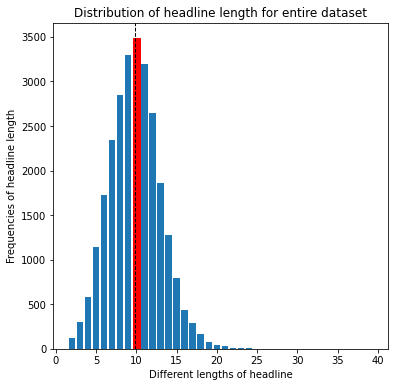

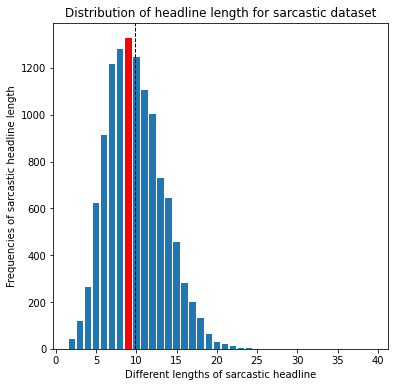

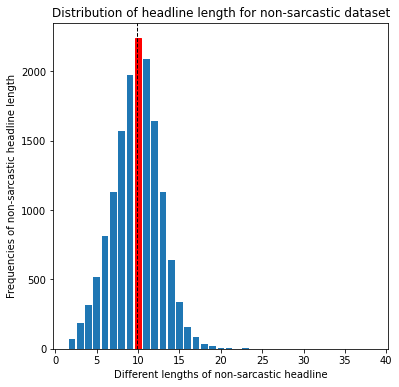

time: 900 ms (started: 2021-08-06 11:34:58 +00:00)


In [40]:
all_dat = stats_df.groupby('headline_count').count()
sarcastic_dat1 = stats_df[stats_df.is_sarcastic==1]
sarcastic_dat = sarcastic_dat1.groupby('headline_count').count()
not_sarcastic_dat1 = stats_df[stats_df.is_sarcastic==0]
not_sarcastic_dat = not_sarcastic_dat1.groupby('headline_count').count()

plt.xlabel('Different lengths of headline')
plt.ylabel('Frequencies of headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for entire dataset')
bar_graph = plt.bar(all_dat.index, all_dat.headline)
bar_graph[8].set_color('r')
plt.axvline(stats_df.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()

plt.xlabel('Different lengths of sarcastic headline')
plt.ylabel('Frequencies of sarcastic headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for sarcastic dataset')
bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline)
bar_graph[7].set_color('r')
plt.axvline(sarcastic_dat1.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()


plt.xlabel('Different lengths of non-sarcastic headline')
plt.ylabel('Frequencies of non-sarcastic headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for non-sarcastic dataset')
bar_graph = plt.bar(not_sarcastic_dat.index, not_sarcastic_dat.headline)
bar_graph[8].set_color('r')
plt.axvline(not_sarcastic_dat1.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()

# difference in the length of sarcastic and non-sarcastic headlines is not significant. 
# median and mean length of headlines is around 10 words

### Frequencies headline with number

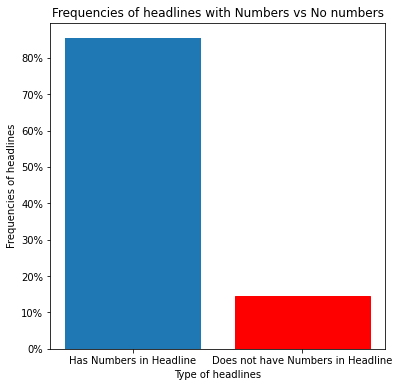

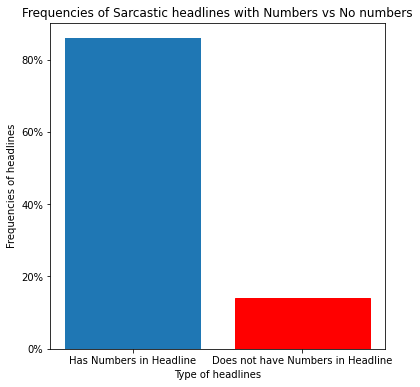

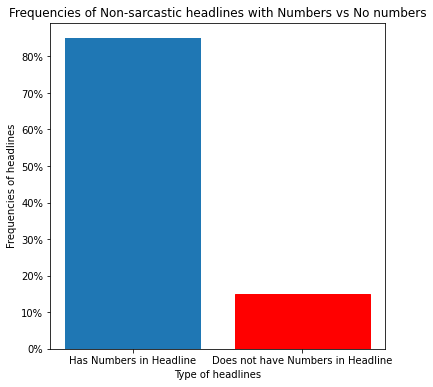

Has Numbers in Headline              0.85
Does not have Numbers in Headline    0.15
Name: headline, dtype: float64
Has Numbers in Headline              0.86
Does not have Numbers in Headline    0.14
Name: headline, dtype: float64
Has Numbers in Headline              0.85
Does not have Numbers in Headline    0.15
Name: headline, dtype: float64
time: 491 ms (started: 2021-08-06 11:34:59 +00:00)


In [41]:
digits_dat = stats_df.groupby('headline_has_digits').count()
digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of headlines with Numbers vs No numbers')
bar_graph = plt.bar(digits_dat.index, digits_dat.headline / digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


sarcastic_digits_dat = stats_df[stats_df.is_sarcastic==1].groupby('headline_has_digits').count()
sarcastic_digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Sarcastic headlines with Numbers vs No numbers')
bar_graph = plt.bar(sarcastic_digits_dat.index, sarcastic_digits_dat.headline / sarcastic_digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


not_sarcastic_digits_dat = stats_df[stats_df.is_sarcastic==0].groupby('headline_has_digits').count()
not_sarcastic_digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Non-sarcastic headlines with Numbers vs No numbers')
bar_graph = plt.bar(not_sarcastic_digits_dat.index, not_sarcastic_digits_dat.headline / not_sarcastic_digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

print(round(digits_dat.headline / digits_dat.headline_count.sum(),2))
print(round(sarcastic_digits_dat.headline / sarcastic_digits_dat.headline_count.sum(),2))
print(round(not_sarcastic_digits_dat.headline / not_sarcastic_digits_dat.headline_count.sum(),2))

# difference in the use of numbers/statistics in sarcastic and non-sarcastic headlines is not significant. 
# ~85% headlines uses numbers

In [42]:
# Lenght of each headline barplot
 
# len_not_sarcastic = stats_df[stats_df['is_sarcastic']==0]['headline'].str.len() #find length of headline (all characters including spaces)
# len_sarcastic = stats_df[stats_df['is_sarcastic']==1]['headline'].str.len() 

# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5)) #subplots to plot side by side

# ax1.hist(len_not_sarcastic,color='#0058b4')
# ax1.set_title('Not Sarcastic')

# ax2.hist(len_sarcastic,color='#ea0103')
# ax2.set_title('Sarcastic')

# fig.suptitle('Length of each headline')
# plt.show()

time: 3.33 ms (started: 2021-08-06 11:34:59 +00:00)


### Number of word for each headline barplot

In [43]:
# count_not_sarcastic = stats_df[stats_df['is_sarcastic']==0]['headline'].str.split() #split headline into words
# cns=count_not_sarcastic.map(lambda x: len(x)) #find no. of words in a headline

# count_sarcastic = stats_df[stats_df['is_sarcastic']==1]['headline'].str.split()
# cs=count_sarcastic.map(lambda x: len(x))

# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5)) #subplots to plot side by side

# ax1.hist(cns,color='#0058b4')
# ax1.set_title('Not Sarcastic')

# ax2.hist(cs,color='#ea0103')
# ax2.set_title('Sarcastic')

# fig.suptitle('Count of words in each headline')
# plt.show() 

time: 3.48 ms (started: 2021-08-06 11:34:59 +00:00)


Usually sarcastic headlines are much longer and have more words

### Average word length in a headline barplot

In [44]:
avg_not_sarcastic = stats_df[stats_df['is_sarcastic']==0]['headline'].map(lambda x: [len(i) for i in x.split()]) #length of each word in a news headline
ansc=avg_not_sarcastic.map(lambda x: np.mean(x)) #mean of those lengths

avg_sarcastic = stats_df[stats_df['is_sarcastic']==1]['headline'].map(lambda x: [len(i) for i in x.split()])
asc=avg_sarcastic.map(lambda x: np.mean(x)) 

time: 454 ms (started: 2021-08-06 11:34:59 +00:00)


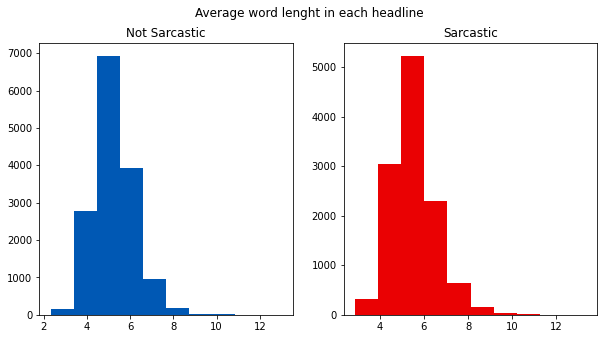

time: 613 ms (started: 2021-08-06 11:35:00 +00:00)


In [45]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5)) #subplots to plot side by side

ax1.hist(ansc,color='#0058b4')
ax1.set_title('Not Sarcastic')

ax2.hist(asc,color='#ea0103')
ax2.set_title('Sarcastic')

fig.suptitle('Average word lenght in each headline')
plt.show() 

In [46]:
df.drop('source', axis=1, inplace=True)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday in the most magical way,0


time: 24.5 ms (started: 2021-08-06 11:35:00 +00:00)


In [47]:
df.to_csv('datasets/sarcasm_dataset.csv', encoding='utf-8', index=False)

time: 619 ms (started: 2021-08-06 11:35:00 +00:00)


## Cleaning


In [48]:
df_cleaned = pd.read_csv("datasets/sarcasm_dataset.csv") 
df_cleaned.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday in the most magical way,0


time: 50.6 ms (started: 2021-08-06 11:35:01 +00:00)


In [49]:
#Removes Line Breaks
# def remove_line_breaks(data):
#     line_tag=re.compile(r'<br\s?\/>|<br>')
#     data=line_tag.sub(r' ',data)
#     return data

#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r' ',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r' ',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r' ',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r' ',data)
    return data

def remove_stopwords(data):
    final_data = []
    for i in data.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            final_data.append(i.strip().lower())
    return " ".join(final_data)


# df_cleaned['headline']=df_cleaned['headline'].apply(lambda z: remove_line_breaks(z))
df_cleaned['headline']=df_cleaned['headline'].apply(lambda z: remove_punctuations(z))
# df_cleaned['headline']=df_cleaned['headline'].apply(lambda z: remove_html(z))
# df_cleaned['headline']=df_cleaned['headline'].apply(lambda z: remove_url(z))
# df_cleaned['headline']=df_cleaned['headline'].apply(lambda z: remove_emoji(z))
df_cleaned['headline']=df_cleaned.headline.apply(lambda x:x.lower())  # convert all words in headline into lower case 
df_cleaned['headline']=df_cleaned['headline'].apply(lambda z: remove_stopwords(z))
df_cleaned['headline']=df_cleaned['headline'].apply(str)

time: 988 ms (started: 2021-08-06 11:35:01 +00:00)


In [50]:
df_cleaned['headline'].head()

0    former versace store clerk sues secret black code minority shoppers
1    roseanne revival catches thorny political mood better worse        
2    mom starting fear son web series closest thing grandchild          
3    boehner wants wife listen come alternative debt reduction ideas    
4    j k rowling wishes snape happy birthday magical way                
Name: headline, dtype: object

time: 6.25 ms (started: 2021-08-06 11:35:02 +00:00)


In [51]:
df_cleaned.to_csv('datasets/cleaned_sarcasm_dataset.csv', encoding='utf-8', index=False)

time: 586 ms (started: 2021-08-06 11:35:02 +00:00)


In [52]:
df_cleaned = pd.read_csv("datasets/cleaned_sarcasm_dataset.csv") 
df_cleaned['headline']=df_cleaned['headline'].apply(str)
df_cleaned.head()

,headline,is_sarcastic
0,former versace store clerk sues secret black code minority shoppers,0
1,roseanne revival catches thorny political mood better worse,0
2,mom starting fear son web series closest thing grandchild,1
3,boehner wants wife listen come alternative debt reduction ideas,1
4,j k rowling wishes snape happy birthday magical way,0


time: 53 ms (started: 2021-08-06 11:35:03 +00:00)


In [53]:
sarcastic_headline=df_cleaned[df_cleaned['is_sarcastic']==1]
not_sarcastic_headline=df_cleaned[df_cleaned['is_sarcastic']==0]

time: 9.73 ms (started: 2021-08-06 11:35:03 +00:00)


### Gram Analysis

In [54]:
#Apply Gram Analysis
df_cleaned_zero=not_sarcastic_headline['headline']
df_cleaned_ones=sarcastic_headline['headline']
print("Bi-gram analysis")
freq_df_cleaned_zero=create_dict(df_cleaned_zero[:200],2)
#print(freq_df_cleaned_zero)
trace_zero=create_new_df(freq_df_cleaned_zero)
freq_df_cleaned_ones=create_dict(df_cleaned_ones[:200],2)
#print(freq_df_cleaned_zero)
trace_ones=create_new_df(freq_df_cleaned_ones)
plot_grams(trace_zero,trace_ones)

Bi-gram analysis


time: 367 ms (started: 2021-08-06 11:35:03 +00:00)


### WordCloud Visualizations

WORD CLOUD All HEADLINES


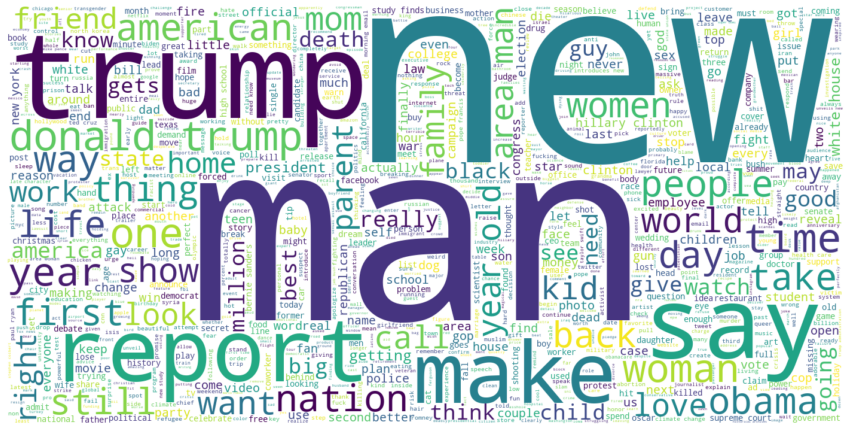

time: 11.8 s (started: 2021-08-06 11:35:03 +00:00)


In [55]:
# Define wordcloud for all headlines

wc = WordCloud(background_color="white", max_words=1000, width = 1400, height = 700)
wc.generate(' '.join(df_cleaned['headline']))
print ("WORD CLOUD All HEADLINES")
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

WORD CLOUD FOR 10000 MOST FREQUENT WORDS IN SARCASTIC HEADLINES


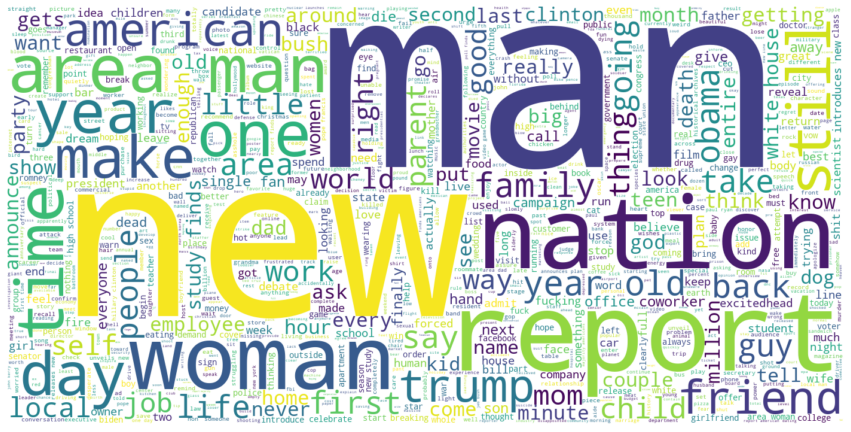

time: 10.9 s (started: 2021-08-06 11:35:15 +00:00)


In [56]:
# Define wordcloud for the sarcastic headlines

wc = WordCloud(background_color="white", max_words=1000, width = 1400, height = 700)
wc.generate(' '.join(df_cleaned[df_cleaned.is_sarcastic == 1]['headline'].apply(str)))
print ("WORD CLOUD FOR 10000 MOST FREQUENT WORDS IN SARCASTIC HEADLINES")
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

WORD CLOUD FOR 10000 MOST FREQUENT WORDS IN NON - SARCASTIC HEADLINES


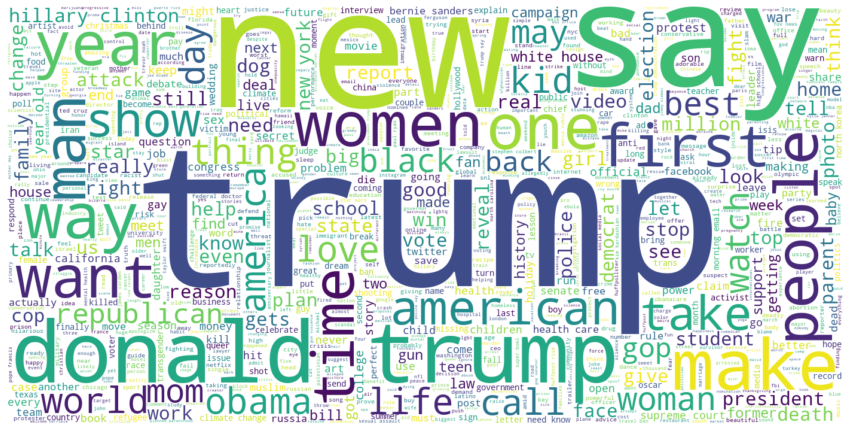

time: 10.9 s (started: 2021-08-06 11:35:26 +00:00)


In [57]:
# Define wordcloud for the non sarcastic headlines

wc = WordCloud(background_color="white", max_words=1000, width = 1400, height = 700)
wc.generate(' '.join(df_cleaned[df_cleaned.is_sarcastic == 0]['headline'].apply(str)))
print ("WORD CLOUD FOR 10000 MOST FREQUENT WORDS IN NON - SARCASTIC HEADLINES")
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Lemmatize the dataset

In [58]:
#Lemmatize the dataset
from nltk.stem import WordNetLemmatizer

def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

df_cleaned['headline']=df_cleaned['headline'].apply(lambda z: lemma_traincorpus(z))

time: 7.22 s (started: 2021-08-06 11:35:37 +00:00)


In [59]:
df_cleaned.to_csv('datasets/cleaned_lemmatized_sarcasm_dataset.csv', encoding='utf-8', index=False)

time: 689 ms (started: 2021-08-06 11:35:44 +00:00)


#TF-IDF

In [60]:
df_cleaned_lemmatized = pd.read_csv("datasets/cleaned_lemmatized_sarcasm_dataset.csv") 
df_cleaned_lemmatized['headline']=df_cleaned_lemmatized['headline'].apply(str)
df_cleaned_lemmatized.head()

,headline,is_sarcastic
0,former versace store clerk sues secret black code minority shoppers,0
1,roseanne revival catches thorny political mood better worse,0
2,mom starting fear son web series closest thing grandchild,1
3,boehner wants wife listen come alternative debt reduction ideas,1
4,j k rowling wishes snape happy birthday magical way,0


time: 51.6 ms (started: 2021-08-06 11:35:45 +00:00)


In [61]:
tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
train_tfidf=tfidf_vect.fit_transform(df_cleaned_lemmatized['headline'].values.tolist())
train_tfidf.shape

(26709, 271761)

time: 1.77 s (started: 2021-08-06 11:35:45 +00:00)


In [62]:
# Outputs from the TF-IDF transformed data
print(train_tfidf) #scipy.sparse.csr.csr_matrixtime:

  (0, 43488)	0.2208505961717002
  (0, 22903)	0.2208505961717002
  (0, 210841)	0.2208505961717002
  (0, 231145)	0.2208505961717002
  (0, 41883)	0.2208505961717002
  (0, 227981)	0.2208505961717002
  (0, 255892)	0.2208505961717002
  (0, 150540)	0.2208505961717002
  (0, 43487)	0.2208505961717002
  (0, 22902)	0.2208505961717002
  (0, 210840)	0.2208505961717002
  (0, 231144)	0.2208505961717002
  (0, 41882)	0.2208505961717002
  (0, 227979)	0.21232200294276687
  (0, 255891)	0.2208505961717002
  (0, 216060)	0.20627086974749512
  (0, 150525)	0.17711141689908502
  (0, 43476)	0.17241779334736174
  (0, 22856)	0.118145257087175
  (0, 210822)	0.14054845711690026
  (0, 231113)	0.17463395686542346
  (0, 41865)	0.18147892385614564
  (0, 227966)	0.15002256228875271
  (0, 255890)	0.2208505961717002
  (1, 153186)	0.2353811062441224
  :	:
  (26707, 26336)	0.23615748583834054
  (26707, 236047)	0.23615748583834054
  (26707, 17057)	0.23615748583834054
  (26707, 119312)	0.23615748583834054
  (26707, 5256)	0.236

## TSVD, PCA, TSNE

In [63]:
def vectorize(data):
    cv=CountVectorizer()
    fit_data_cv=cv.fit_transform(data)
    return fit_data_cv,cv


def tfidf(data):
    tfidfv=TfidfVectorizer()
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_cv,tfidfv

def dimen_reduc_plot(test_data,test_label,option):
    tsvd= TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
    tsne=TSNE(n_components=2,random_state=42) #not recommended instead use PCA
    pca=SparsePCA(n_components=2,random_state=42)
    if(option==1):
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors = ['#ea0103', '#0058b4']
        
        sns.scatterplot(x=tsvd_result[:,0],y=tsvd_result[:,1],c=test_label, cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='#ea0103',label='Not Sarcastic Headlines')
        color_blue=mpatches.Patch(color='#0058b4',label='Sarcastic Headlines')
        plt.legend(handles=[color_blue,color_red])
        plt.title("TSVD")
        plt.show()
        # plt.figure(figsize=(10,10))
        # plt.scatter(tsvd_result[:,0],tsvd_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        # color_red=mpatches.Patch(color='red',label='Not Sarcastic Headlines')
        # color_orange=mpatches.Patch(color='orange',label='Sarcastic Headlines')
        # plt.legend(handles=[color_orange,color_red])
        # plt.title("TSVD")
        # plt.show()
    if(option==2):
        tsne_result=tsne.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors = ['#ea0103', '#0058b4']
        sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1], c=test_label, cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='#ea0103',label='Not Sarcastic Headlines')
        color_blue=mpatches.Patch(color='#0058b4',label='Sarcastic Headlines')
        plt.legend(handles=[color_blue,color_red])
        plt.title("PCA")
        plt.show()
        # plt.figure(figsize=(10,10))
        # plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        # color_red=mpatches.Patch(color='red',label='Not Sarcastic Headlines')
        # color_orange=mpatches.Patch(color='orange',label='Sarcastic Headlines')
        # plt.legend(handles=[color_orange,color_red])
        # plt.title("PCA")
        # plt.show() 
    if(option==3):
        pca_result=pca.fit_transform(test_data.toarray())
        plt.figure(figsize=(10,8))
        colors = ['#ea0103', '#0058b4']
        sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1], c=test_label, cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='#ea0103',label='Not Sarcastic Headlines')
        color_blue=mpatches.Patch(color='#0058b4',label='Sarcastic Headlines')
        plt.legend(handles=[color_blue,color_red])
        plt.title("TSNE")
        plt.show()
        # plt.figure(figsize=(10,10))
        # plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        # color_red=mpatches.Patch(color='red',label='Not Sarcastic Headlines')
        # color_orange=mpatches.Patch(color='orange',label='Sarcastic Headlines')
        # plt.legend(handles=[color_orange,color_red])
        # plt.title("TSNE")
        # plt.show()

train_data=df_cleaned_lemmatized       
data_vect=train_data['headline'].values
# data_vect_good=sarcastic_headline['headline'].values
target_vect=train_data['is_sarcastic'].values
# target_data_vect_good=df_cleaned_lemmatized[df_cleaned_lemmatized['is_sarcastic']==1]['is_sarcastic'].values
# data_vect_bad=not_sarcastic_headline['headline'].values
#target_data_vect_bad=df_cleaned_lemmatized[df_cleaned_lemmatized['is_sarcastic']==1]['is_sarcastic'].values
train_data_cv,cv= vectorize(data_vect)
# real_review_train_data_cv,cv=vectorize(data_vect_good)

#print(train_data.head())



time: 405 ms (started: 2021-08-06 11:35:47 +00:00)


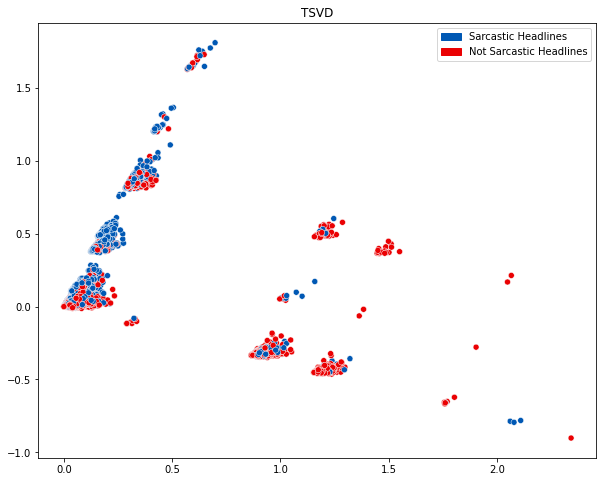

time: 1.3 s (started: 2021-08-06 11:35:47 +00:00)


In [64]:
dimen_reduc_plot(train_data_cv,target_vect,1)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,1)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_bad,1)

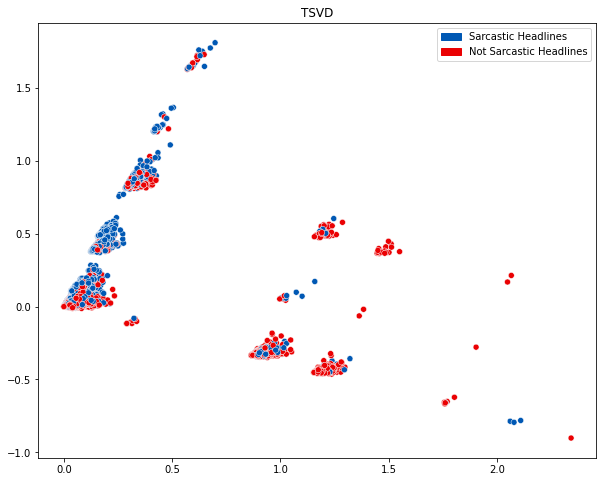

time: 1.34 s (started: 2021-08-06 11:35:48 +00:00)


In [65]:
# TSVD visualization on first 5000 samples
dimen_reduc_plot(train_data_cv,target_vect,1)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,1)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_bad,1)

In [66]:
# PCA visualization on first 5000 samples
train_data=df_cleaned_lemmatized[:5000]       
data_vect=train_data['headline'].values
target_vect=train_data['is_sarcastic'].values
# target_data_vect_good=df_cleaned_lemmatized[df_cleaned_lemmatized['is_sarcastic']==1]['is_sarcastic'].values
# target_data_vect_bad=df_cleaned_lemmatized[df_cleaned_lemmatized['is_sarcastic']==1]['is_sarcastic'].values
train_data_cv,cv= vectorize(data_vect)

time: 87.1 ms (started: 2021-08-06 11:35:50 +00:00)


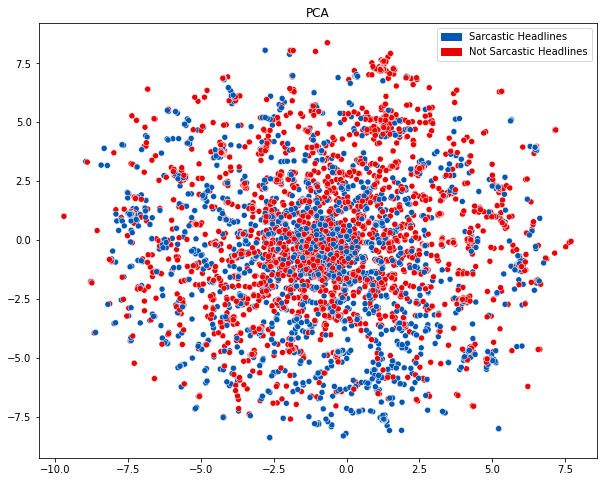

time: 1min 7s (started: 2021-08-06 11:35:50 +00:00)


In [67]:
dimen_reduc_plot(train_data_cv,target_vect,2)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,2)

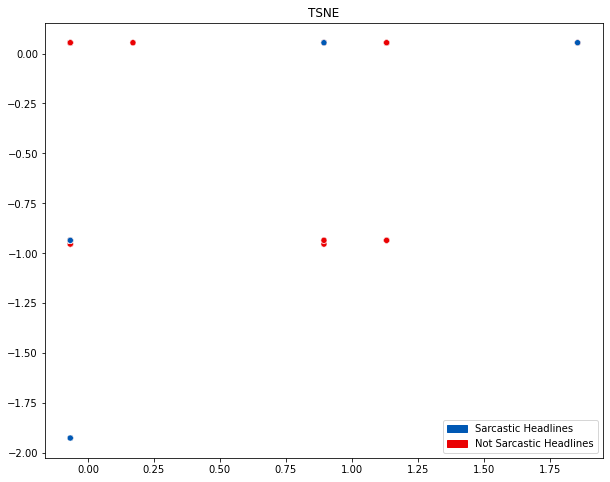

time: 2min 44s (started: 2021-08-06 11:36:57 +00:00)


In [68]:
# TSNE visualization on first 5000 samples
dimen_reduc_plot(train_data_cv,target_vect,3)
# dimen_reduc_plot(real_review_train_data_cv,target_data_vect_good,3)

# Static Semantic Embeddings


In [13]:
df_cleaned_lemmatized = pd.read_csv("datasets/cleaned_lemmatized_sarcasm_dataset.csv") 
df_cleaned_lemmatized['headline']=df_cleaned_lemmatized['headline'].apply(str)
df_cleaned_lemmatized.head()

,headline,is_sarcastic
0,former versace store clerk sues secret black code minority shoppers,0
1,roseanne revival catches thorny political mood better worse,0
2,mom starting fear son web series closest thing grandchild,1
3,boehner wants wife listen come alternative debt reduction ideas,1
4,j k rowling wishes snape happy birthday magical way,0


time: 60.3 ms (started: 2021-08-06 12:30:42 +00:00)


In [14]:
check_df=list(df_cleaned_lemmatized['headline'].str.split())

time: 40.2 ms (started: 2021-08-06 12:30:42 +00:00)


## Word2Vec

In [71]:
model=Word2Vec(check_df,min_count=1)
word_li=list(model.wv.vocab)
print(word_li[:5])

['former', 'versace', 'store', 'clerk', 'sues']
time: 7.18 s (started: 2021-08-06 11:39:42 +00:00)


In [72]:
#View the Tensor
print(model)
print(model['former'])

Word2Vec(vocab=24742, size=100, alpha=0.025)
[-0.03408889 -0.01778706  0.581078    0.55498874  0.68073523 -0.38616523
  0.0850241   0.15525083  0.04283919  0.02085328 -0.33655304  0.07695122
  0.3861839   0.0995742   0.41403824  0.24183254  0.15022366 -0.19371073
 -0.00840813 -0.17471299 -0.25812227 -0.36388856 -0.29437837  0.00874267
 -0.5367958   0.03930399 -0.12191924  0.00727947  0.29544404 -0.04214253
  0.39257798  0.30023357 -0.22875008 -0.03853044 -0.27597025  0.48068962
 -0.5405227   0.35119057 -0.05194586  0.1198397   0.20132165 -0.2789976
 -0.24959718  0.08612467 -0.3033341  -0.3858636  -0.2252586  -0.01985234
 -0.02351923 -0.14277108  0.5986301  -0.04011991  0.18633646  0.41782576
 -0.09437399  0.02855835  0.3814796   0.32416546  0.06184877 -0.20752302
  0.30203944  0.07576434 -0.30647618 -0.03160709 -0.4105282   0.12060975
 -0.4415194   0.27346712  0.32040137 -0.34398007  0.13392192  0.32201323
  0.42759585  0.41323286  0.02591078  0.05308493 -0.23077324  0.24061637
  0.294

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



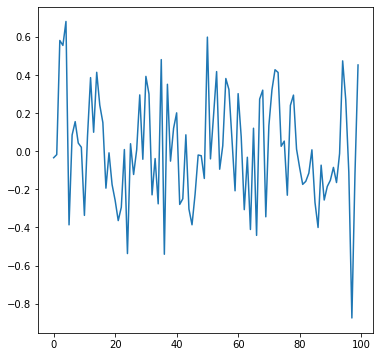

time: 164 ms (started: 2021-08-06 11:39:49 +00:00)


In [73]:
#View the Embedding Word Vector
plt.plot(model['former'])
plt.show()

In [74]:
# save the modeled words produced from Word2Vec
model.save('Embeddings/Sarcasm/word2vec_model.bin')

time: 1.4 s (started: 2021-08-06 11:39:49 +00:00)


In [75]:
loaded_model=KeyedVectors.load('Embeddings/Sarcasm/word2vec_model.bin')
print(loaded_model)

Word2Vec(vocab=24742, size=100, alpha=0.025)
time: 241 ms (started: 2021-08-06 11:39:51 +00:00)


In [76]:
# Measure Cosine distance
distance=model.similarity('former','store')
print(distance)

0.9997202
time: 2.57 ms (started: 2021-08-06 11:39:51 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



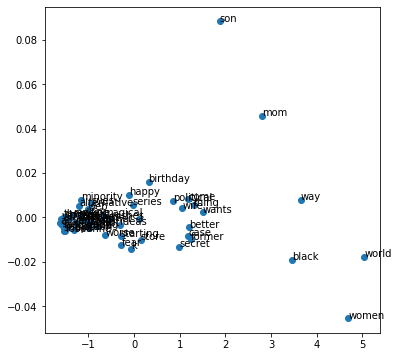

time: 513 ms (started: 2021-08-06 11:39:51 +00:00)


In [77]:
# PCA transform in 2D for visualization of embedded words

from matplotlib import pyplot
pca = PCA(n_components=2)
transformation_model=loaded_model[loaded_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(loaded_model.wv.vocab)
for i, word in enumerate(words[:50]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [78]:
#!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

time: 1.01 ms (started: 2021-08-06 11:39:51 +00:00)


In [79]:
#!gzip -d GoogleNews-vectors-negative300.bin.gz

time: 938 µs (started: 2021-08-06 11:39:51 +00:00)


 ## Google News Embeddings

In [80]:
#Using Google News Embeddings For our corpus
google_news_embed='Embeddings/GoogleNews-vectors-negative300.bin'
google_loaded_model=KeyedVectors.load_word2vec_format(google_news_embed,binary=True)
print(google_loaded_model)

time: 1min 24s (started: 2021-08-06 11:39:51 +00:00)


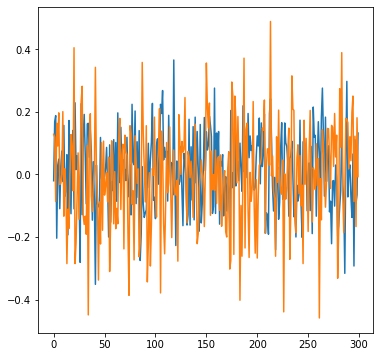

time: 170 ms (started: 2021-08-06 11:41:16 +00:00)


In [81]:
#Visualize the Word Vectors
plt.plot(google_loaded_model['former'])
plt.plot(google_loaded_model['store'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



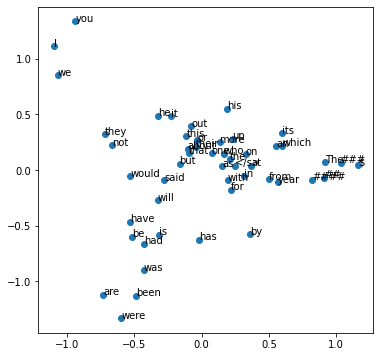

time: 13.7 s (started: 2021-08-06 11:41:16 +00:00)


In [82]:
# PCA transform in 2D for visualization of google news embedded words

pca = PCA(n_components=2)
transformation_model=google_loaded_model[google_loaded_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(google_loaded_model.wv.vocab)
for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Glove Embeddings

In [83]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

time: 680 µs (started: 2021-08-06 11:41:30 +00:00)


In [84]:
# !unzip glove*.zip

time: 1.14 ms (started: 2021-08-06 11:41:30 +00:00)


In [85]:
glove_file='Embeddings/glove.6B.50d.txt'
word2vec_output_file = 'Embeddings/Sarcasm/glove_p1_.6B.50d.txt.word2vec'
glove_loaded=glove2word2vec(glove_file, word2vec_output_file)
print(glove_loaded)

(400000, 50)
time: 11.3 s (started: 2021-08-06 11:41:30 +00:00)


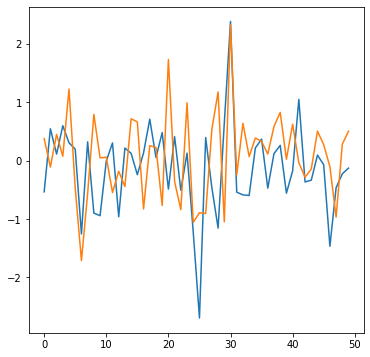

time: 23.1 s (started: 2021-08-06 11:41:41 +00:00)


In [86]:
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
plt.plot(glove_model['former'])
plt.plot(glove_model['store'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



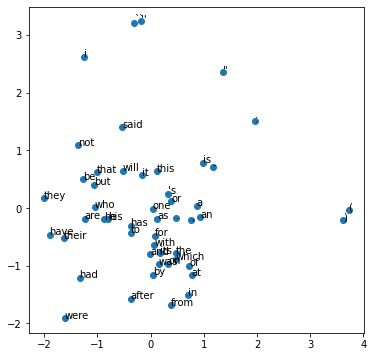

time: 2.21 s (started: 2021-08-06 11:42:05 +00:00)


In [87]:
# PCA transform in 2D for visualization of glove embedded words

pca = PCA(n_components=2)
transformation_model=glove_model[glove_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(glove_model.wv.vocab)
for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

##Fasttext

In [88]:
#!unzip crawl-300d-2M.vec.zip

time: 977 µs (started: 2021-08-06 11:42:07 +00:00)


In [89]:
fasttext_file="Embeddings/crawl-300d-2M.vec"
print(fasttext_file)

Embeddings/crawl-300d-2M.vec
time: 2.36 ms (started: 2021-08-06 11:42:07 +00:00)


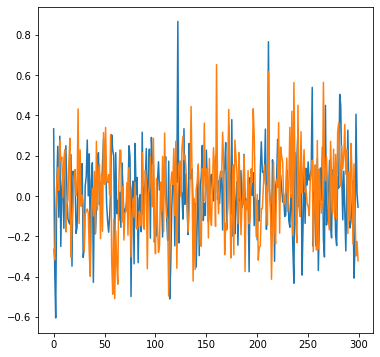

time: 10min 29s (started: 2021-08-06 11:42:07 +00:00)


In [90]:
fasttext_model = KeyedVectors.load_word2vec_format(fasttext_file, binary=False)
plt.plot(fasttext_model['former'])
plt.plot(fasttext_model['store'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



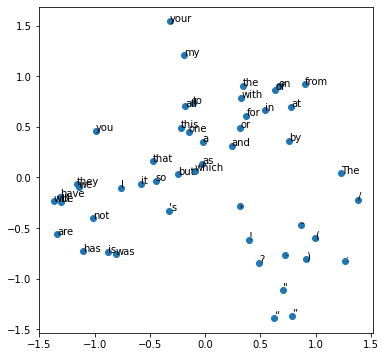

time: 9.68 s (started: 2021-08-06 11:52:36 +00:00)


In [91]:
# PCA transform in 2D for visualization of glove embedded words

pca = PCA(n_components=2)
transformation_model=fasttext_model[fasttext_model.wv.vocab]
result = pca.fit_transform(transformation_model[:50])
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(fasttext_model.wv.vocab)
for i, word in enumerate(words[:50]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Creating Embedding Matrix

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



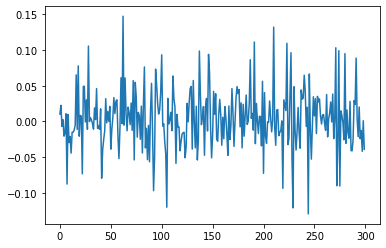

time: 1min 26s (started: 2021-08-06 12:31:21 +00:00)


In [15]:
maxlen=1000
max_features=5000 
embed_size=300

train_sample=df_cleaned_lemmatized['headline']

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sample))
train_sample=tokenizer.texts_to_sequences(train_sample)

#Pad the sequence- To allow same length for all vectorized words
train_sample=pad_sequences(train_sample,maxlen=maxlen)

EMBEDDING_FILE = 'Embeddings/wiki-news-300d-1M-subword.vec'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
plt.plot(embedding_matrix[20])
plt.show()

# Dynamic Semantic Embeddings

In [16]:
df_cleaned_lemmatized = pd.read_csv("datasets/cleaned_lemmatized_sarcasm_dataset.csv") 
df_cleaned_lemmatized['headline']=df_cleaned_lemmatized['headline'].apply(str)
df_cleaned_lemmatized.head()

,headline,is_sarcastic
0,former versace store clerk sues secret black code minority shoppers,0
1,roseanne revival catches thorny political mood better worse,0
2,mom starting fear son web series closest thing grandchild,1
3,boehner wants wife listen come alternative debt reduction ideas,1
4,j k rowling wishes snape happy birthday magical way,0


time: 60.9 ms (started: 2021-08-06 12:32:48 +00:00)


## BERT Embeddings

In [17]:
#tokenize and encode the inputs
tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained('bert-large-uncased')
def bert_encode(data,maximum_length) :
    input_ids = []
    attention_masks = []
  
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
        
          data[i],
          add_special_tokens=True,
          max_length=maximum_length,
          pad_to_max_length=True,
        
          return_attention_mask=True,
        
        )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

train_input_ids,train_attention_masks = bert_encode(df_cleaned_lemmatized['headline'][:5],1000)

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length

time: 58.2 s (started: 2021-08-06 12:32:48 +00:00)


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [18]:
# Visualize the attention masks and input ids.
train_attention_masks,train_input_ids

(array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[  101,  2280, 18601, ...,     0,     0,     0],
        [  101,  3123, 20147, ...,     0,     0,     0],
        [  101,  3566,  3225, ...,     0,     0,     0],
        [  101,  8945, 11106, ...,     0,     0,     0],
        [  101,  1046,  1047, ...,     0,     0,     0]]))

time: 6.01 ms (started: 2021-08-06 12:33:46 +00:00)


In [19]:
# Build a miniature model for extracting the embeddings
import tensorflow as tf
from keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import layers
input_ids = tf.keras.layers.Input(shape=(128,), name='input_token', dtype='int32')
input_masks_ids = tf.keras.layers.Input(shape=(128,), name='masked_token', dtype='int32')
bert_output=bert_model([input_ids,input_masks_ids])[0]
bert_output.shape
bert_output[:,0,:]
model=Model(inputs=[input_ids,input_masks_ids],outputs=[bert_output])
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

## Transfomer Method

In [20]:
#Convert the textual Headlines to list for analysing sentences(sentence vectors)
z=df_cleaned_lemmatized['headline'].tolist()

time: 1.93 ms (started: 2021-08-06 12:34:26 +00:00)


In [21]:
#Use the tokenizer and model  from the Transformers and determine the output features from the last hidden layer.
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

def get_embeddings(model_name,tokenizer,name,inp):
    tokenizer = tokenizer.from_pretrained(name)
    model = model_name.from_pretrained(name)
    input_ids = tf.constant(tokenizer.encode(inp))[None, :]  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]
    cls_token=last_hidden_states[0]
    return cls_token
cls_token=get_embeddings(TFBertModel,BertTokenizer,'bert-base-uncased',z[0])
cls_token

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<tf.Tensor: shape=(15, 768), dtype=float32, numpy=
array([[-2.7491549e-01, -5.7399709e-02, -3.6221156e-01, ...,
        -3.2744044e-01,  2.5826642e-01,  1.9323975e-01],
       [ 2.2700855e-01,  3.6561713e-02, -2.6666054e-01, ...,
        -4.3947792e-01,  4.1207349e-01,  6.9580287e-02],
       [ 1.2354372e+00, -7.5682729e-01,  1.3644842e+00, ...,
         8.9373723e-02, -1.6879781e-01,  4.0858054e-01],
       ...,
       [ 9.3085313e-01, -6.3922709e-01,  1.1131020e+00, ...,
         1.8349582e-01, -1.2823645e-02, -1.1954910e+00],
       [-2.3373261e-02,  1.9994979e-01,  5.2831322e-04, ...,
        -1.6504669e-01, -4.0476844e-01, -4.1770762e-01],
       [ 6.1729133e-01,  1.6540785e-01, -3.2999191e-01, ...,
        -5.8735326e-02, -6.1783582e-01, -1.7402916e-01]], dtype=float32)>

time: 22.3 s (started: 2021-08-06 12:34:26 +00:00)


(15, 768)


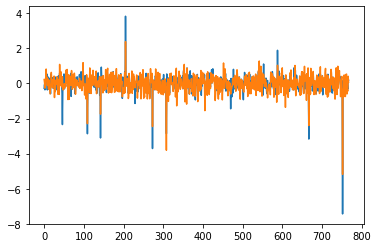

time: 173 ms (started: 2021-08-06 12:34:48 +00:00)


In [22]:
# For visualizing the embeddings 
print(cls_token.shape)
plt.plot(cls_token[0])
plt.plot(cls_token[1])
plt.show()

## DistilBERT

In [23]:
#Distil BERT Embeddings
import numpy as np
from transformers import AutoTokenizer, pipeline, TFDistilBertModel
from scipy.spatial.distance import cosine
def transformer_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
embedding_features1=transformer_embedding('distilbert-base-uncased',z[0],TFDistilBertModel)
embedding_features2=transformer_embedding('distilbert-base-uncased',z[1],TFDistilBertModel)
distance=1-cosine(embedding_features1[0],embedding_features2[0])
print(distance)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


0.9212547522444212
time: 24.2 s (started: 2021-08-06 12:34:48 +00:00)


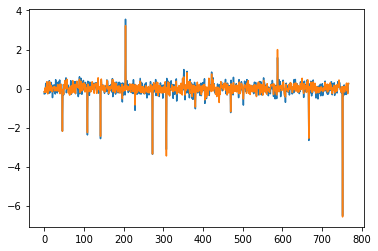

time: 244 ms (started: 2021-08-06 12:35:13 +00:00)


In [24]:
# Visualize embeddings
plt.plot(embedding_features1[0])
plt.plot(embedding_features2[0])

## BERT Embeddings using the Pipeline Module

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are in

0.8724558265335272


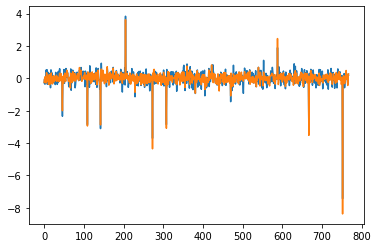

time: 15.4 s (started: 2021-08-06 12:35:13 +00:00)


In [25]:
# BERT embeddings
from transformers import AutoTokenizer, pipeline, TFBertModel
bert_features1=transformer_embedding('bert-base-uncased',z[0],TFBertModel)
bert_features2=transformer_embedding('bert-base-uncased',z[1],TFBertModel)
distance=1-cosine(bert_features1[0],bert_features2[0])
print(distance)
plt.plot(bert_features1[0])
plt.plot(bert_features2[0])
plt.show()

## Roberta Model

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


0.9968126616549092


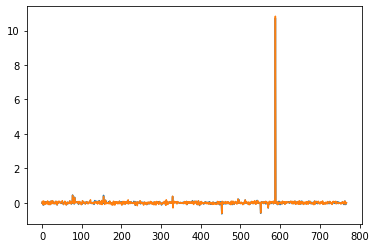

time: 35.6 s (started: 2021-08-06 12:35:28 +00:00)


In [26]:
##Roberta Embeddings
from transformers import AutoTokenizer, pipeline, TFRobertaModel
roberta_features1=transformer_embedding('roberta-base',z[0],TFRobertaModel)
roberta_features2=transformer_embedding('roberta-base',z[1],TFRobertaModel)
distance=1-cosine(roberta_features1[0],roberta_features2[0])
print(distance)
plt.plot(roberta_features1[0])
plt.plot(roberta_features2[0])
plt.show()

## XLNet Embeddings

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


0.889983634646662


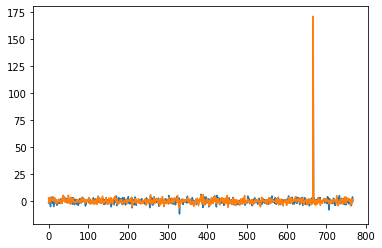

time: 31.9 s (started: 2021-08-06 12:36:04 +00:00)


In [27]:
from transformers import AutoTokenizer, pipeline, TFXLNetModel
xlnet_features1=transformer_embedding('xlnet-base-cased',z[0],TFXLNetModel)
xlnet_features2=transformer_embedding('xlnet-base-cased',z[1],TFXLNetModel)
distance=1-cosine(xlnet_features1[0],xlnet_features2[0])
print(distance)
plt.plot(xlnet_features1[0])
plt.plot(xlnet_features2[0])
plt.show()

## BART Model

Some weights of the model checkpoint at facebook/bart-base were not used when initializing BartModel: ['final_logits_bias']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at facebook/bart-base were not used when initializing BartModel: ['final_logits_bias']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0.9875841419738616


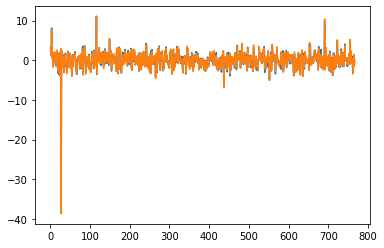

time: 28.6 s (started: 2021-08-06 12:36:36 +00:00)


In [28]:
from transformers import AutoTokenizer, pipeline, BartModel
bart_features1=transformer_embedding('facebook/bart-base',z[0],BartModel)
bart_features2=transformer_embedding('facebook/bart-base',z[1],BartModel)
distance=1-cosine(bart_features1[0],bart_features2[0])
print(distance)
plt.plot(bart_features1[0])
plt.plot(bart_features2[0])
plt.show()

## Albert 

Some layers from the model checkpoint at albert-base-v1 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


Some layers from the model checkpoint at albert-base-v1 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


0.7728450559289464


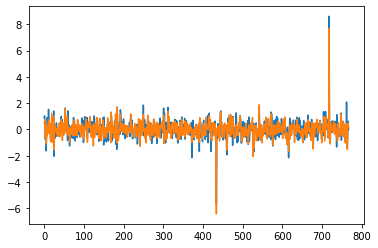

time: 13.7 s (started: 2021-08-06 12:37:04 +00:00)


In [29]:
from transformers import AutoTokenizer, pipeline, TFAlbertModel
albert_features1=transformer_embedding('albert-base-v1',z[0],TFAlbertModel)
albert_features2=transformer_embedding('albert-base-v1',z[1],TFAlbertModel)
distance=1-cosine(albert_features1[0],albert_features2[0])
print(distance)
plt.plot(albert_features1[0])
plt.plot(albert_features2[0])
plt.show()

## Flaubert

Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0.47836347480831143


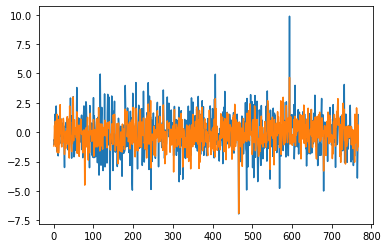

time: 34.7 s (started: 2021-08-06 12:37:18 +00:00)


In [30]:
# Flaubert
from transformers import AutoTokenizer, pipeline, FlaubertModel
flaubert_features1=transformer_embedding('flaubert/flaubert_base_cased',z[0],FlaubertModel)
flaubert_features2=transformer_embedding('flaubert/flaubert_base_cased',z[1],FlaubertModel)
distance=1-cosine(flaubert_features1[0],flaubert_features2[0])
print(distance)
plt.plot(flaubert_features1[0])
plt.plot(flaubert_features2[0])
plt.show()

## GPT-Generative Pretraining

All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.


All model checkpoint layers were used when initializing TFOpenAIGPTModel.

All the layers of TFOpenAIGPTModel were initialized from the model checkpoint at openai-gpt.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFOpenAIGPTModel for predictions without further training.


0.27042332844712114


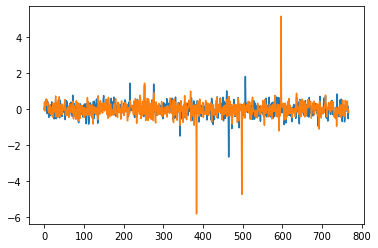

time: 30.6 s (started: 2021-08-06 12:37:53 +00:00)


In [31]:
#GPT embeddings
from transformers import AutoTokenizer, pipeline, TFOpenAIGPTModel
def transformer_gpt_embedding(name,inp,model_name):

    model = model_name.from_pretrained(name)
    tokenizer = AutoTokenizer.from_pretrained(name)
    tokenizer.pad_token = "[PAD]"
    pipe = pipeline('feature-extraction', model=model, 
                tokenizer=tokenizer)
    features = pipe(inp)
    features = np.squeeze(features)
    return features
gpt_features1=transformer_gpt_embedding('openai-gpt',z[0],TFOpenAIGPTModel)
gpt_features2=transformer_gpt_embedding('openai-gpt',z[1],TFOpenAIGPTModel)
distance=1-cosine(gpt_features1[0],gpt_features2[0])
print(distance)
plt.plot(gpt_features1[0])
plt.plot(gpt_features2[0])
plt.show()

## GPT-2

You are using a model of type openai-gpt to instantiate a model of type gpt2. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at openai-gpt were not used when initializing TFGPT2Model: ['transformer/tokens_embed/weight:0', 'transformer/positions_embed/embeddings:0']
- This IS expected if you are initializing TFGPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFGPT2Model were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['transformer/ln_f/gamma:0', 'transformer/wte/weight:0', 'transformer/wpe/embeddings:0', 'tran

0.9877780956334788


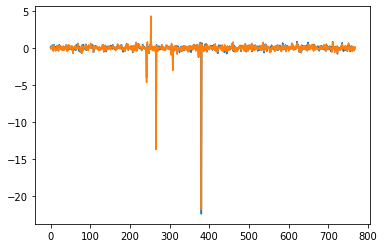

time: 15.2 s (started: 2021-08-06 12:38:23 +00:00)


In [32]:
#GPT-2
from transformers import AutoTokenizer, pipeline, TFGPT2Model

gpt2_features1=transformer_gpt_embedding('openai-gpt',z[0],TFGPT2Model)
gpt2_features2=transformer_gpt_embedding('openai-gpt',z[1],TFGPT2Model)
distance=1-cosine(gpt2_features1[0],gpt2_features2[0])
print(distance)
plt.plot(gpt2_features1[0])
plt.plot(gpt2_features2[0])
plt.show()

## Electra


Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-small-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


Some layers from the model checkpoint at google/electra-small-discriminator were not used when initializing TFElectraModel: ['discriminator_predictions']
- This IS expected if you are initializing TFElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFElectraModel were initialized from the model checkpoint at google/electra-small-discriminator.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraModel for predictions without further training.


0.8881837331710138


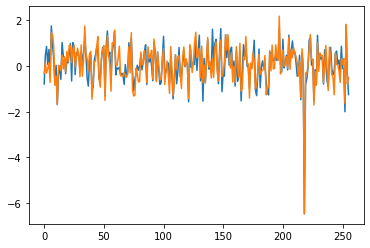

time: 13.3 s (started: 2021-08-06 12:38:39 +00:00)


In [33]:
# Electra
from transformers import AutoTokenizer, pipeline, TFElectraModel
electra_features1=transformer_embedding('google/electra-small-discriminator',z[0],TFElectraModel)
electra_features2=transformer_embedding('google/electra-small-discriminator',z[1],TFElectraModel)
distance=1-cosine(electra_features1[0],electra_features2[0])
print(distance)
plt.plot(electra_features1[0])
plt.plot(electra_features2[0])
plt.show()

## Longformer

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


0.9962423289667748


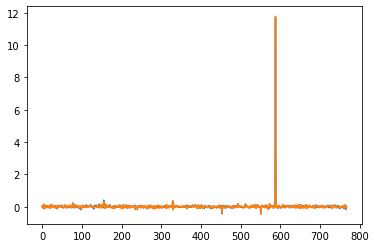

time: 1min 21s (started: 2021-08-06 12:38:52 +00:00)


In [34]:
#Longformer
from transformers import AutoTokenizer, pipeline, TFLongformerModel
longformer_features1=transformer_embedding('allenai/longformer-base-4096',z[0],TFLongformerModel)
longformer_features2=transformer_embedding('allenai/longformer-base-4096',z[1],TFLongformerModel)
distance=1-cosine(longformer_features1[0],longformer_features2[0])
print(distance)
plt.plot(longformer_features1[0])
plt.plot(longformer_features2[0])
plt.show()

# Create Train and Test set

In [35]:
train_df = pd.read_csv("datasets/cleaned_lemmatized_sarcasm_dataset.csv") 
train_df['headline']=train_df['headline'].apply(str)
train_df.head()

,headline,is_sarcastic
0,former versace store clerk sues secret black code minority shoppers,0
1,roseanne revival catches thorny political mood better worse,0
2,mom starting fear son web series closest thing grandchild,1
3,boehner wants wife listen come alternative debt reduction ideas,1
4,j k rowling wishes snape happy birthday magical way,0


time: 53.9 ms (started: 2021-08-06 12:40:13 +00:00)


In [36]:
label=train_df['is_sarcastic']
train_df, test_df = train_test_split(train_df, test_size=0.15, random_state=101, stratify=label)
#train_df, val_df = train_test_split(train_df, test_size=0.10, random_state=101)
print("Train size:{}".format(train_df.shape))
#print("Validation size:{}".format(val_df.shape))
print("Test size:{}".format(test_df.shape))

Train size:(22702, 2)
Test size:(4007, 2)
time: 33.1 ms (started: 2021-08-06 12:40:13 +00:00)


In [37]:
train_df['is_sarcastic'].value_counts()

0    12737
1    9965 
Name: is_sarcastic, dtype: int64

time: 11.4 ms (started: 2021-08-06 12:40:13 +00:00)


In [38]:
test_df['is_sarcastic'].value_counts()

0    2248
1    1759
Name: is_sarcastic, dtype: int64

time: 8.43 ms (started: 2021-08-06 12:40:13 +00:00)


In [39]:
train_df.to_csv('datasets/train.csv', encoding='utf-8', index=False)
test_df.to_csv('datasets/test.csv', encoding='utf-8', index=False)

time: 1.29 s (started: 2021-08-06 12:40:13 +00:00)
